In [14]:
"""Importing the necessary Libraries"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the Dataset

In [15]:
# The Original Raw Dataset- (Women’s Activities in Armed Rebellion) WAAR_data
waar_data = pd.read_csv('WAAR_data.csv', encoding='latin1')
waar_data.head(5)

,sideb,sideb_full,country_primary,sidea,sideb_id,NSAdyad_id,frontline_prev_best,frontline_prev_low,frontline_prev_high,frontline,...,wwing_frontline,wwing_noncombat,noncombat_clandestine,noncombat_outreach,noncombat_logistics,lead_military,lead_noncombat,coalition,coalition_name,low_information
0,ABSDF,All-Burma Students Democratic Front,Myanmar (Burma),Government of Myanmar (Burma),185.0,322.0,2.0,1.0,3.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0,NaN,0.0
1,ABSU,All Bodo Students Union,India,Government of India,362.0,309.0,1.0,1.0,2.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0,NaN,0.0
2,ADF,Alliance of Democratic Forces,Uganda,Government of Uganda,489.0,153.0,2.0,2.0,3.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0,NaN,0.0
3,AFDL,Alliance of Democratic Forces for the Liberati...,DR Congo (Zaire),Government of DR Congo (Zaire),422.0,39.0,NaN,NaN,NaN,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,NaN,1.0
4,AFRC,Armed Forces Revolutionary Council,Sierra Leone,Government of Sierra Leone,533.0,131.0,2.0,2.0,2.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,NaN,0.0


In [16]:
# Grouping by country and calculating mean values
country_summary = data.groupby('country_primary')[
    ['participation', 'frontline_prev_best', 'noncombat_prev_best', 'lead_prev_best']
].mean().reset_index()

# Sorting countries by overall participation
country_summary = country_summary.sort_values(by='participation', ascending=False)
country_summary.head(10)


,country_primary,participation,frontline_prev_best,noncombat_prev_best,lead_prev_best
86,Zimbabwe (Rhodesia),1.0,2.666667,3.666667,2.666667
44,Nepal,1.0,4.000000,4.000000,4.000000
23,Georgia,1.0,0.666667,1.000000,0.666667
24,Guatemala,1.0,2.500000,3.500000,1.500000
62,South Africa,1.0,2.500000,4.000000,3.000000
60,Slovenia,1.0,0.000000,0.000000,0.000000
28,Indonesia,1.0,2.666667,3.333333,2.000000
59,Sierra Leone,1.0,1.750000,2.000000,0.750000
58,Senegal,1.0,2.000000,3.000000,0.000000
56,Rwanda,1.0,1.666667,2.333333,1.000000


# Handling missing data

In [17]:
# Checking for missing values in the dataset
missing_values = data.isnull().sum()
missing_values

sideb                    0
sideb_full               0
country_primary          0
sidea                    0
sideb_id                 0
NSAdyad_id               0
frontline_prev_best      0
frontline_prev_low       0
frontline_prev_high      0
frontline                0
noncombat_prev_best      0
noncombat_prev_low       0
noncombat_prev_high      0
noncombat                0
lead_prev_best           0
lead_prev_low            0
lead_prev_high           0
lead                     0
participation            0
founders                 2
wwing                    2
wwing_frontline          5
wwing_noncombat          5
noncombat_clandestine    2
noncombat_outreach       2
noncombat_logistics      2
lead_military            0
lead_noncombat           0
coalition                0
low_information          0
dtype: int64

In [18]:
# Percentage of missing data per column
missing_percentage = (missing_values / len(data)) * 100
missing_percentage

sideb                    0.000000
sideb_full               0.000000
country_primary          0.000000
sidea                    0.000000
sideb_id                 0.000000
NSAdyad_id               0.000000
frontline_prev_best      0.000000
frontline_prev_low       0.000000
frontline_prev_high      0.000000
frontline                0.000000
noncombat_prev_best      0.000000
noncombat_prev_low       0.000000
noncombat_prev_high      0.000000
noncombat                0.000000
lead_prev_best           0.000000
lead_prev_low            0.000000
lead_prev_high           0.000000
lead                     0.000000
participation            0.000000
founders                 0.537634
wwing                    0.537634
wwing_frontline          1.344086
wwing_noncombat          1.344086
noncombat_clandestine    0.537634
noncombat_outreach       0.537634
noncombat_logistics      0.537634
lead_military            0.000000
lead_noncombat           0.000000
coalition                0.000000
low_informatio

# Droping Columns with too many missing values [coalition_name]

In [23]:
# Dropping columns with excessive missing data
columns_to_drop = ['coalition_name']
data = data.drop(columns=columns_to_drop)


In [20]:
data.head()

,sideb,sideb_full,country_primary,sidea,sideb_id,NSAdyad_id,frontline_prev_best,frontline_prev_low,frontline_prev_high,frontline,...,wwing,wwing_frontline,wwing_noncombat,noncombat_clandestine,noncombat_outreach,noncombat_logistics,lead_military,lead_noncombat,coalition,low_information
0,ABSDF,All-Burma Students Democratic Front,Myanmar (Burma),Government of Myanmar (Burma),185.0,322.0,2.0,1.0,3.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0,0.0
1,ABSU,All Bodo Students Union,India,Government of India,362.0,309.0,1.0,1.0,2.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0,0.0
2,ADF,Alliance of Democratic Forces,Uganda,Government of Uganda,489.0,153.0,2.0,2.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0,0.0
3,AFDL,Alliance of Democratic Forces for the Liberati...,DR Congo (Zaire),Government of DR Congo (Zaire),422.0,39.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1.0
4,AFRC,Armed Forces Revolutionary Council,Sierra Leone,Government of Sierra Leone,533.0,131.0,2.0,2.0,2.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0.0


# Imputing Missing Values

In [27]:
# Filling participation-related columns with 0
participation_cols = [
    'frontline_prev_best', 'frontline_prev_low', 'frontline_prev_high',
    'noncombat_prev_best', 'noncombat_prev_low', 'noncombat_prev_high',
    'lead_prev_best', 'lead_prev_low', 'lead_prev_high',
    'frontline', 'noncombat', 'lead'
]
data[participation_cols] = data[participation_cols].fillna(0)

# Imputing other numerical columns with the mean
numerical_cols = ['NSAdyad_id', 'low_information', 'lead_military', 'lead_noncombat']
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())


In [29]:
# Checking if there are any other remaining missing values
print(data.isnull().sum())

sideb                    0
sideb_full               0
country_primary          0
sidea                    0
sideb_id                 0
NSAdyad_id               0
frontline_prev_best      0
frontline_prev_low       0
frontline_prev_high      0
frontline                0
noncombat_prev_best      0
noncombat_prev_low       0
noncombat_prev_high      0
noncombat                0
lead_prev_best           0
lead_prev_low            0
lead_prev_high           0
lead                     0
participation            0
founders                 2
wwing                    2
wwing_frontline          5
wwing_noncombat          5
noncombat_clandestine    2
noncombat_outreach       2
noncombat_logistics      2
lead_military            0
lead_noncombat           0
coalition                0
low_information          0
dtype: int64


In [30]:
# Saving the cleaned DataFrame to a new CSV file named "Cleaned_data.csv"
cleaned_data = 'Cleaned_data.csv'
data.to_csv(cleaned_data, index=False)
cleaned_data


'Cleaned_data.csv'

In [31]:
dataclean = pd.read_csv("Cleaned_data.csv")

In [56]:
dataclean.head()

,sideb,sideb_full,country_primary,sidea,sideb_id,NSAdyad_id,frontline_prev_best,frontline_prev_low,frontline_prev_high,frontline,...,wwing,wwing_frontline,wwing_noncombat,noncombat_clandestine,noncombat_outreach,noncombat_logistics,lead_military,lead_noncombat,coalition,low_information
0,ABSDF,All-Burma Students Democratic Front,Myanmar (Burma),Government of Myanmar (Burma),185.0,322.0,2.0,1.0,3.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0,0.0
1,ABSU,All Bodo Students Union,India,Government of India,362.0,309.0,1.0,1.0,2.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0,0.0
2,ADF,Alliance of Democratic Forces,Uganda,Government of Uganda,489.0,153.0,2.0,2.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0,0.0
3,AFDL,Alliance of Democratic Forces for the Liberati...,DR Congo (Zaire),Government of DR Congo (Zaire),422.0,39.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1.0
4,AFRC,Armed Forces Revolutionary Council,Sierra Leone,Government of Sierra Leone,533.0,131.0,2.0,2.0,2.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0.0


In [43]:
# Sorting countries based on a key participation metric (such as frontline participation)
highest_participation = data[['country_primary', 'frontline_prev_best']].sort_values(by='frontline_prev_best', ascending=False)

# Displaying top countries with highest participation
highest_participation


,country_primary,frontline_prev_best
116,El Salvador,4.0
64,Nepal,4.0
193,Iran,4.0
185,Colombia,4.0
183,Sri Lanka,4.0
...,...,...
159,Afghanistan,0.0
163,DR Congo (Zaire),0.0
166,Iraq,0.0
168,Uganda,0.0


In [42]:
# Summarizing characteristics of the organizations for countries with the highest participation
top_countries = highest_participation['country_primary']

# Filtering data for the top countries
top_countries_data = data[data['country_primary'].isin(top_countries)]

# Summarizzing key characteristics of the rebel organizations
organization_summary = top_countries_data[['country_primary', 'coalition', 'founders', 'wwing', 
                                          'lead_military', 'lead_noncombat', 'noncombat_outreach', 
                                          'noncombat_logistics']].groupby('country_primary').mean()

organization_summary


,coalition,founders,wwing,lead_military,lead_noncombat,noncombat_outreach,noncombat_logistics
country_primary,,,,,,,
Afghanistan,0.000000,0.0,0.153846,0.000000,0.769231,0.769231,0.692308
Algeria,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
Angola,0.000000,0.0,0.333333,0.333333,0.333333,0.666667,0.666667
Argentina,0.000000,0.5,1.000000,0.000000,1.000000,1.000000,1.000000
Azerbaijan,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...
Venezuela,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000
Vietnam (South Vietnam),0.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
"Western Sahara, Morocco",0.000000,0.0,1.000000,0.000000,1.000000,1.000000,1.000000


# Visualizing the Cleaned_data

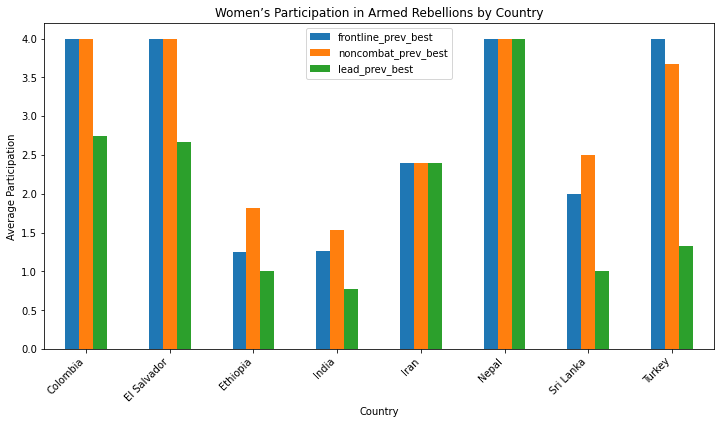

In [38]:
import matplotlib.pyplot as plt

# Ploting bar chart showing the participation in various roles for the top countries
top_countries_data.groupby('country_primary')[['frontline_prev_best', 'noncombat_prev_best', 'lead_prev_best']].mean().plot(kind='bar', figsize=(12, 6))
plt.title('Women’s Participation in Armed Rebellions by Country')
plt.ylabel('Average Participation')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.show()


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading dataset
df = pd.read_csv('Cleaned_data.csv')


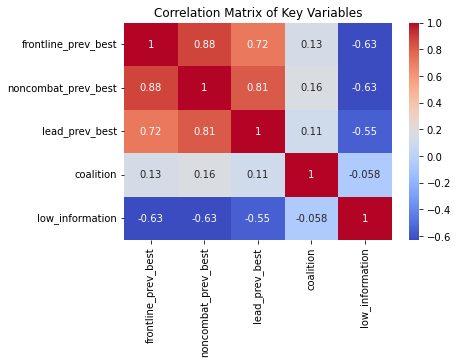

In [9]:
# 3. Correlation Matrix
# Selecting relevant columns for analysis
correlation_columns = ['frontline_prev_best', 'noncombat_prev_best', 
                       'lead_prev_best', 'coalition', 'low_information']

# Calculating Spearman correlation
corr_matrix = df[correlation_columns].corr(method='spearman')

# Visualizing the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Variables')
plt.show()


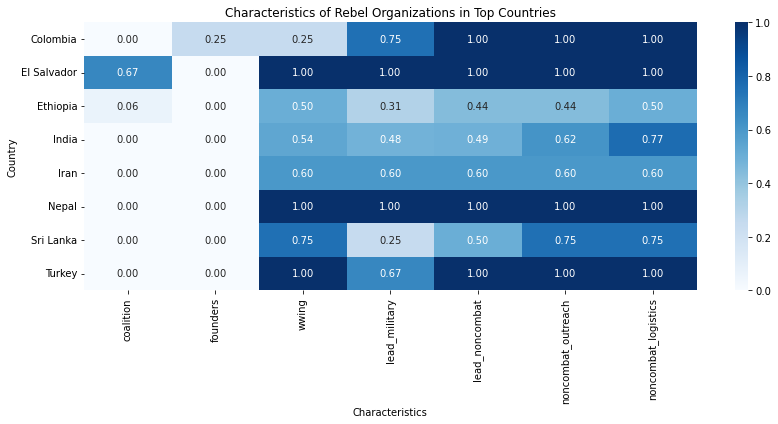

In [41]:
import seaborn as sns

# Heatmap of rebel organization characteristics for top countries
plt.figure(figsize=(12, 6))
sns.heatmap(organization_summary, annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.title('Characteristics of Rebel Organizations in Top Countries')
plt.ylabel('Country')
plt.xlabel('Characteristics')
plt.tight_layout()
plt.show()


In [31]:

data = pd.read_csv("Cleaned_data.csv")

# Define features and target for visualization
numeric_features = ['frontline_prev_best', 'noncombat_prev_best', 'lead_prev_best', 
                    'founders', 'lead_military', 'coalition']
target = 'participation'  # Binary column indicating women's participation

# 1. Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[numeric_features])
plt.title("Box Plot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

In [29]:
# 3. Pair Plot
sns.pairplot(data[numeric_features + [target]], hue=target, palette="husl")
plt.suptitle("Pair Plot of Selected Features and Target", y=1.02)
plt.show()

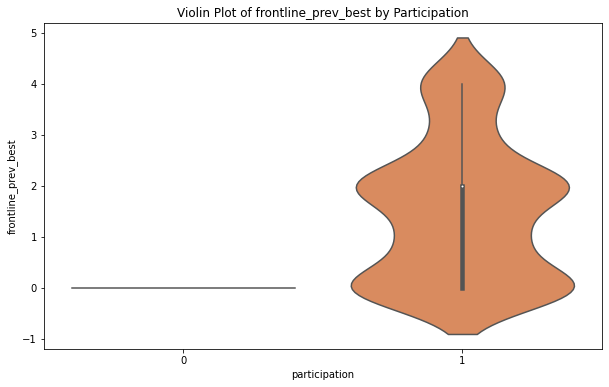

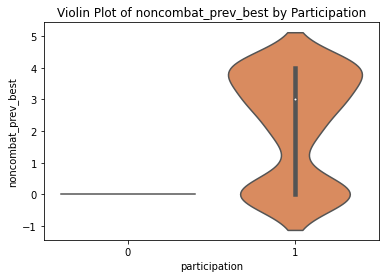

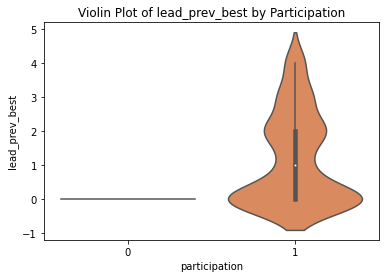

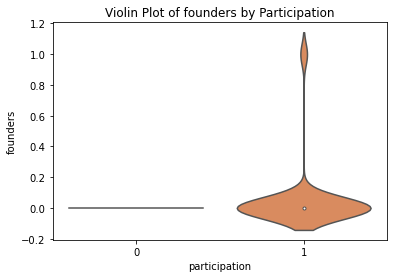

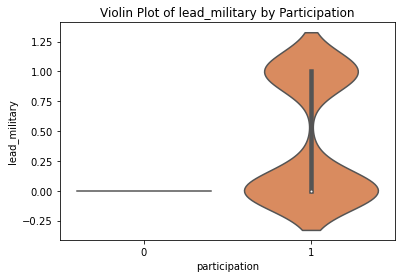

In [36]:
# 2. Violin Plot
plt.figure(figsize=(10, 6))
for feature in numeric_features:
    sns.violinplot(x=target, y=feature, data=data, split=True, palette="muted")
    plt.title(f"Violin Plot of {feature} by Participation")
    plt.show()

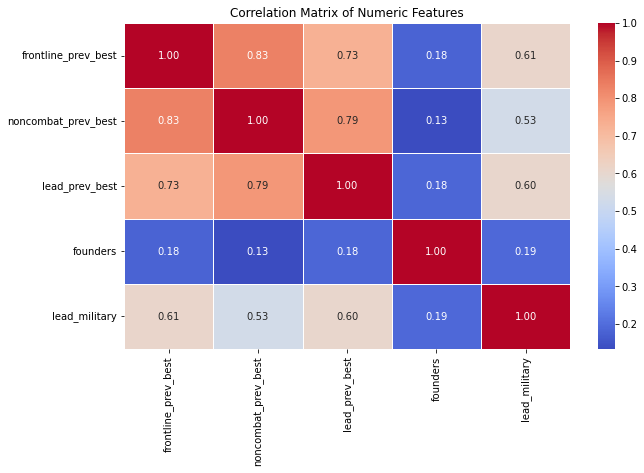

In [34]:
# 4. Heatmap (Correlation Matrix)
correlation_matrix = data[numeric_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()